# Mapeamento de patentes

## Bibliotecas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Banco limpo

In [5]:
# Exporte o DataFrame para o arquivo Excel
df = pd.read_excel('dados_parceiros_longo_completo.xlsx')
df.head()

,Unnamed: 0,ID,data_publicacao,diretoria,numero_revista,codigo,titulo,numero,data_deposito,data_prioridade,...,responsavel31,responsavel32,responsavel33,responsavel34,responsavel35,ordem_respons,responsavel,parceria,ifes,ifes_abrev
0,0,ID00001,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2013 016644-8,27/06/2013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN
1,1,ID00002,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2014 001105-6,16/01/2014,18/01/2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN
2,2,ID00003,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2017 004929-9,13/03/2017,NaN,...,NaN,NaN,NaN,NaN,NaN,responsavel01,UNIVERSIDADE FEDERAL DO CEARÁ,Titular,Sim,UFC
3,3,ID00004,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2017 024659-0,17/11/2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN
4,4,ID00005,07/01/2020,Patente,2557,3.1,Publicação do Pedido de Patente ou de Certific...,BR 10 2017 026178-6,05/12/2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN


In [9]:
tab = df.groupby('ifes').agg(n=('ID', 'nunique')).reset_index()
tab

,ifes,n
0,Não,20935
1,Sim,3779


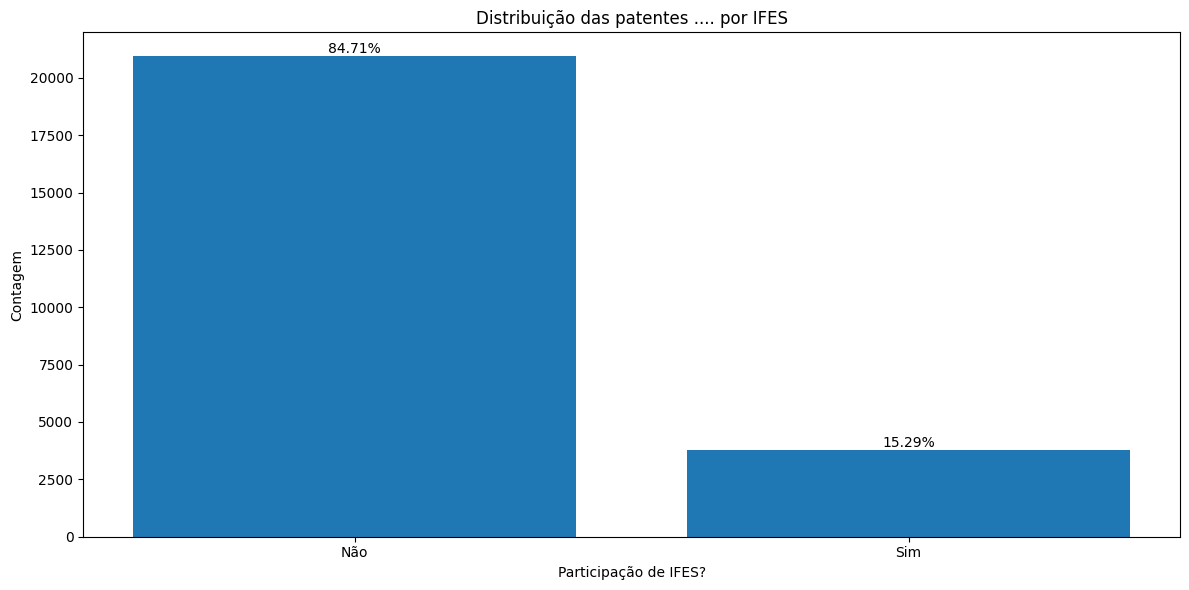

In [21]:
# Agrupe os dados e conte as ocorrências de cada categoria na coluna 'ifes'
counts = df.groupby('ifes')['ID'].nunique()

# Calcule o total de IDs distintos
total = counts.sum()

# Calcule as porcentagens
percentages = (counts / total * 100).round(2)

# Crie o gráfico de barras
plt.figure(figsize=(12, 6))  # Defina o tamanho da figura

# Usando Matplotlib para criar o gráfico de barras
bars = plt.bar(counts.index, counts.values)

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Participação de IFES?')  # Rótulo do eixo x
plt.ylabel('Contagem')  # Rótulo do eixo y
plt.title('Distribuição das patentes .... por IFES')  # Título do gráfico

# Adicione as porcentagens sobre as barras
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent}%', ha='center', va='bottom')

plt.tight_layout()  # Ajuste automático da disposição para evitar cortes

# Mostre o gráfico
plt.show()

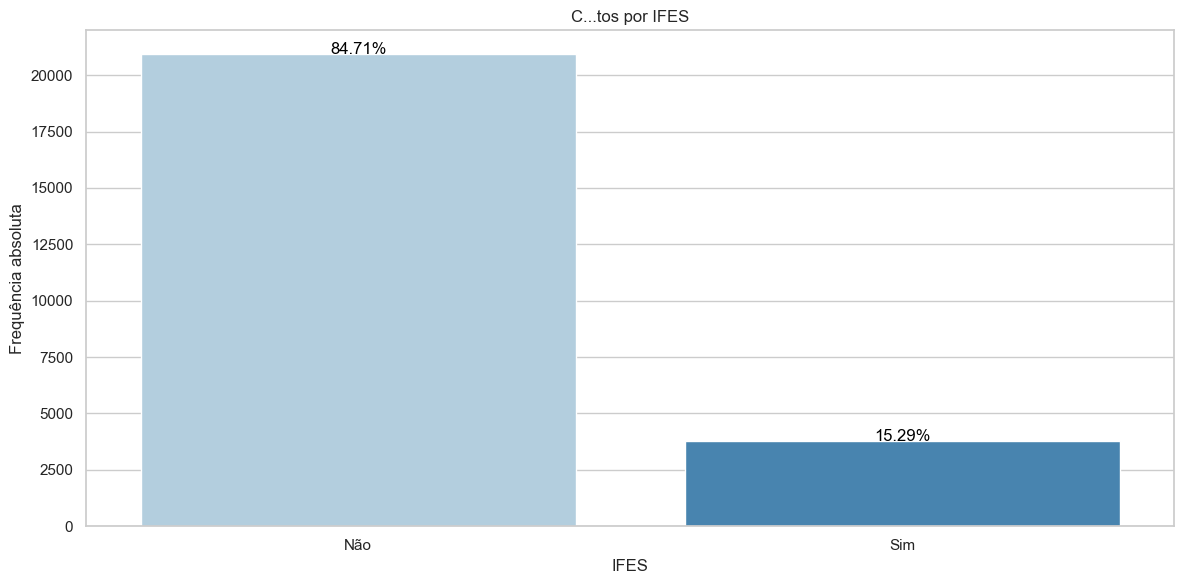

In [30]:
# Agrupe os dados e conte IDs distintos em cada categoria da coluna 'ifes'
counts = df.groupby('ifes')['ID'].nunique().reset_index()

# Calcule o total de IDs distintos
total = counts['ID'].sum()

# Calcule as porcentagens
counts['Percentage'] = (counts['ID'] / total * 100).round(2)

# Crie o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Estilo de fundo

# Crie o gráfico de barras com as porcentagens
barplot = sns.barplot(x='ifes', y='ID', hue='ifes', data=counts, palette="Blues", legend=False)

# Adicione as porcentagens sobre as barras
for index, row in counts.iterrows():
    barplot.text(row.name, row['ID'], f"{row['Percentage']}%", color='black', ha="center")

plt.xticks(rotation=0)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('IFES')
plt.ylabel('Frequência absoluta')
plt.title('C...tos por IFES')

# Mostre o gráfico
plt.tight_layout()
plt.show()
